<a href="https://colab.research.google.com/github/efazel/engle_granger_critical_values/blob/master/engle_granger_critical_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Co-integration Analysis (**preliminary and incomplete**)
by Ehsan Fazel

Two variables are said to be co-integrated if both are non-stationary and there exists a linear combination of the two that is stationay. We know that regressing two non-stationary variables is prone to be possibly spurious, but in the case of co-integration between the two the regression gains significance. A good example is the relationship between consumption and disposable income:

$$ C^{(t)} = C_{0} + mpc Y^{(t)}_{d} $$

where $C_{0}$ is the autonomous consumption and $mpc$ is the marginal propensity to consumer. Both consumption and GDP are non-stationary variables, but the economic theory establishes a meaningful relationship between the two.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

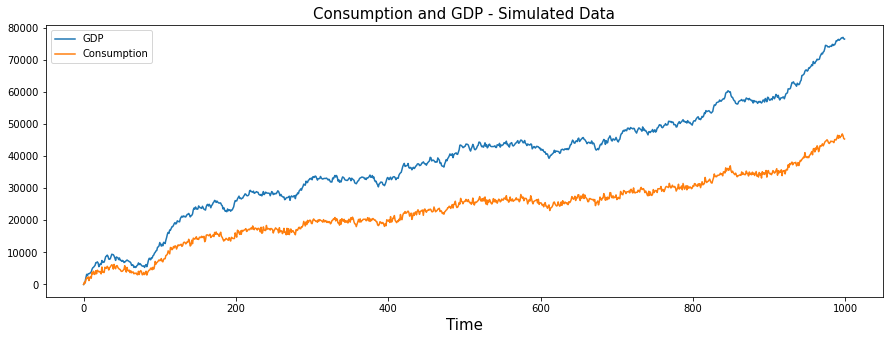

In [ ]:
# Simulate 1000 data for consumption and GDP and present a graph:
t = 1000
np.random.seed(0)
y = np.zeros((t,1))
c = np.zeros((t,1))
mpc = 0.6
phi = 1
C0 = 5000
ey = np.random.normal(100, 500, t)
ec = np.random.normal(100, 500, t)

y_prev = y[1,:]
for i in range(1, t):
  y[i,:] = phi*y_prev + ey[i]
  c[i,:] = mpc*y[i,:] + ec[i]
  y_prev = y[i,:]

plt.figure(figsize=(15,5))
plt.plot(y, label="GDP")
plt.plot(c, label = "Consumption")
plt.xlabel('Time', fontsize = 15)
plt.title('Consumption and GDP - Simulated Data', fontsize = 15)
plt.legend();

In [ ]:
import statsmodels.api as sm

y = sm.add_constant(y)
model = sm.OLS(c, y)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.233e+05
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        04:42:43   Log-Likelihood:                -7600.8
No. Observations:                1000   AIC:                         1.521e+04
Df Residuals:                     998   BIC:                         1.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.9199     38.645      3.465      0.0

High Durbin-Watson statistics (greater than 2) shows that the residuals are not autocorrelated.

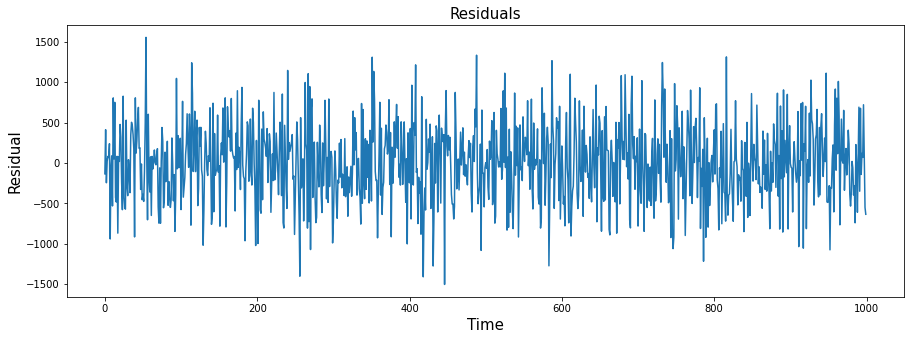

In [ ]:
# Plot the residuals
residuals = results.resid

plt.figure(figsize=(15,5))
plt.plot(residuals)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Residual', fontsize = 15)
plt.title('Residuals', fontsize = 15);

In [ ]:
# Augmented Dicky-Fuller test:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(residuals)
print('Augmented Dicky-Fuller Statistics: ' + str(adf_result[0]))
print('p-value: ' + str(adf_result[1]))
for key, value in adf_result[4].items():
	print('\t%s: %.3f' % (key, value))
print('H1: Time series is stationary')

Augmented Dicky-Fuller Statistics: -32.81043416442901
p-value: 0.0
	1%: -3.437
	5%: -2.864
	10%: -2.568
H1: Time series is stationary


In [ ]:
# Engle-Granger test:
from statsmodels.tsa.stattools import coint

EG_test_results = coint(c, y)
#print(EG_test_results)
print('Engle-Granger statistics: ' + str(EG_test_results[0]))
print('p-value: ' + str(EG_test_results[1]))
print('1%: ' + str(EG_test_results[2][0]))
print('5%: ' + str(EG_test_results[2][1]))
print('10%: ' + str(EG_test_results[2][2]))
print('H0: Consumption and GDP are NOT co-integrated')

Engle-Granger statistics: -32.82689754451959
p-value: 0.0
1%: -4.308223063763983
5%: -3.749242617442257
10%: -3.458404245967689
H0: Consumption and GDP are NOT co-integrated


In [ ]:
n = 500
t_stat = []
s = []

for i in range(1, n):
  #np.random.seed(0)
  xx = np.random.randn(i+2,1)
  yy = np.random.randn(i+2,1)
  size = yy.shape[0]
  s.append(size)
  xx = sm.add_constant(xx)
  model2 = sm.OLS(yy, xx)
  results2 = model2.fit()
  residuals2 = results2.resid
  diff_residuals2 = np.diff(residuals2)
  lag_residuals2 = residuals2[:-1]
  xxx = sm.add_constant(lag_residuals2)
  yyy = diff_residuals2
  model3 = sm.OLS(yyy, xxx)
  results3 = model3.fit()
  t_value = results3.tvalues[1]
  t_stat.append(t_value)

(array([ 2.,  3.,  4.,  6.,  2.,  5.,  3.,  2.,  8.,  9., 10.,  5.,  9.,
        10., 10., 14.,  8., 11.,  8., 11.,  8.,  9., 16.,  6.,  8.,  6.,
         7.,  9.,  6.,  8., 13.,  5.,  8.,  5.,  9.,  9.,  8.,  6.,  4.,
         6.,  3.,  8.,  6.,  5.,  3.,  4., 11., 10.,  9.,  4.,  9.,  5.,
         5.,  7.,  5.,  4.,  4.,  3.,  0.,  3.,  4.,  4.,  7.,  5.,  4.,
         8.,  1.,  5.,  3.,  5.,  3.,  3.,  4.,  1.,  3.,  1.,  1.,  7.,
         3.,  0.,  3.,  2.,  1.,  4.,  0.,  3.,  0.,  2.,  3.,  0.,  1.,
         0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-23.81087911, -23.57277032, -23.33466153, -23.09655274,
        -22.85844394, -22.62033515, -22.38222636, -22.14411757,
        -21.90600878, -21.66789999, -21.4297912 , -21.19168241,
        -20.95357362, -20.71546482, -20.47735603, -20.23924724,
        -20.00113845, -19.76302966, -19.52492087, -19.28681208,
        -19.04870329, -18.8105945 , -18.5724857 , -18.33437691,
        -18.09626812, -17.85815933, -17.62005054, 

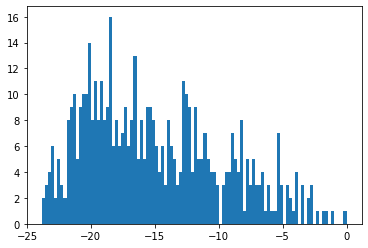

In [ ]:
plt.hist(t_stat, bins=100);

## Monte Carlo Simualtion

In [ ]:
# Monte Carlo simulation:
n = 600
t_stat = []
s = []
mc = 10000
mu = 0.0
sig = 1.0

for i in range(1, mc):
  xx = np.zeros((n,1))
  yy = np.zeros((n,1))
  phi = 1

  restart = True
  while restart:
    exx = np.random.normal(mu, sig, n)
    eyy = np.random.normal(mu, sig, n)
    xx_prev = xx[1,:]
    yy_prev = yy[1,:]
    for j in range(1, n):
      xx[j,:] = phi*xx_prev + exx[j]
      yy[j,:] = phi*yy_prev + eyy[j]
      xx_prev = xx[j,:]
      yy_prev = yy[j,:]
    
    coint_test = coint(yy, xx)
    if coint_test[1] > 0.05:
      break
  
    
  #np.random.seed(0)
  #xx = np.random.normal(0, 1, n)
  #yy = np.random.normal(0, 1, n)
  #xx = np.random.randn(n,1)
  #yy = np.random.randn(n,1)
  #size = yy.shape[0]
  #s.append(size)
  xx = sm.add_constant(xx)
  model2 = sm.OLS(yy, xx)
  results2 = model2.fit()
  residuals2 = results2.resid
  diff_residuals2 = np.diff(residuals2)
  #diff_residuals2_1 = np.diff(diff_residuals2)
  #diff_residuals2_2 = np.diff(diff_residuals2_1)
  #lag_residuals2 = residuals2[:-3]
  #diff_residuals2_1_x = diff_residuals2_1[:-1]
  #xxx = np.concatenate((lag_residuals2, diff_residuals2_1_x, diff_residuals2_2), axis = 0)
  #xxx = np.column_stack((lag_residuals2, diff_residuals2_1_x, diff_residuals2_2))
  #xxx = pd.DataFrame([lag_residuals2.T, diff_residuals2_1_x.T, diff_residuals2_2.T])
  #xxx = sm.add_constant(xxx) No constant term
  #yyy = pd.DataFrame([diff_residuals2[:-2].T])
  #xxx = residuals2[1:]
  #yyy = diff_residuals2
  
  #yyy = residuals2[1:]
  #xxx = residuals2[:-1]
  #model3 = sm.OLS(yyy, xxx)
  
  yyy = diff_residuals2
  xxx = residuals2[:-1]
  model3 = sm.OLS(yyy,xxx)
  results3 = model3.fit()
  #t_value = results3.tvalues[1] No constant term
  t_value = results3.tvalues[0]
  t_stat.append(t_value)

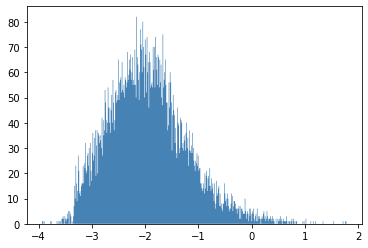

In [ ]:
plt.hist(t_stat, bins=500, alpha = 1.0,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

In [ ]:
print('%1 critical value: ' + str(np.percentile(t_stat, 1)))
print('%5 critical value: ' + str(np.percentile(t_stat, 5)))
print('%10 critical value: ' + str(np.percentile(t_stat, 10)))

%1 critical value: -3.2980087073903928
%5 critical value: -3.0600311620372604
%10 critical value: -2.857093788425133


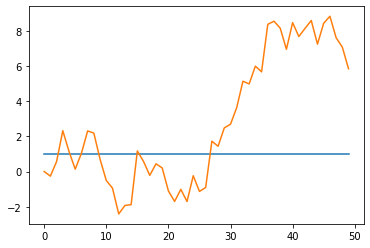

In [ ]:
plt.plot(xx)

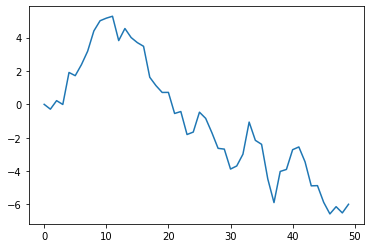

In [ ]:
plt.plot(yy)

In [ ]:
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              140.6
Date:                Thu, 30 Jul 2020   Prob (F-statistic):                    7.20e-16
Time:                        04:59:23   Log-Likelihood:                         -74.728
No. Observations:                  49   AIC:                                      151.5
Df Residuals:                      48   BIC:                                      153.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
coint_test[1]

0.2236792103793508

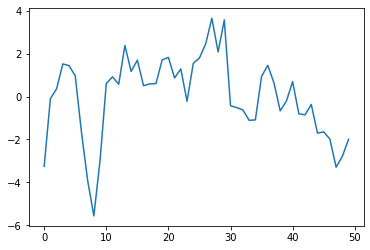

In [ ]:
plt.plot(residuals2)